In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sobelX = np.array(
    [[1,0,-1],
     [2,0,-2],
     [1,0,-1],
    ],
    dtype=np.float32,
)
sobelX

array([[ 1.,  0., -1.],
       [ 2.,  0., -2.],
       [ 1.,  0., -1.]], dtype=float32)

In [4]:
sobelX.T

array([[ 1.,  2.,  1.],
       [ 0.,  0.,  0.],
       [-1., -2., -1.]], dtype=float32)

```python
---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<ipython-input-6-26ffbda3a62d> in <module>
----> 1 sobelX.T = np.random.rand(3,3)
      2 sobelX

AttributeError: attribute 'T' of 'numpy.ndarray' objects is not writable
```

### `np.pad()`
How do we pad a matrix/ndarray with zeros? Is there functions already written for us?
- [https://numpy.org/doc/stable/reference/generated/numpy.pad.html](https://numpy.org/doc/stable/reference/generated/numpy.pad.html)

In [5]:
np.pad(sobelX, ((1,1), (1,1)), "constant")

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0., -1.,  0.],
       [ 0.,  2.,  0., -2.,  0.],
       [ 0.,  1.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]], dtype=float32)

In [6]:
np.pad(sobelX, ((1,1), (1,1)))  # "constant" is the default mode

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0., -1.,  0.],
       [ 0.,  2.,  0., -2.,  0.],
       [ 0.,  1.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]], dtype=float32)

In [7]:
np.pad(sobelX, ((1,1), (1,1)), "constant", constant_values=-100)

array([[-100., -100., -100., -100., -100.],
       [-100.,    1.,    0.,   -1., -100.],
       [-100.,    2.,    0.,   -2., -100.],
       [-100.,    1.,    0.,   -1., -100.],
       [-100., -100., -100., -100., -100.]], dtype=float32)

In [8]:
np.pad(sobelX, ((1,1), (1,1)), "constant", constant_values=(3.14159, 2.71828))

array([[ 3.14159,  3.14159,  3.14159,  3.14159,  2.71828],
       [ 3.14159,  1.     ,  0.     , -1.     ,  2.71828],
       [ 3.14159,  2.     ,  0.     , -2.     ,  2.71828],
       [ 3.14159,  1.     ,  0.     , -1.     ,  2.71828],
       [ 3.14159,  2.71828,  2.71828,  2.71828,  2.71828]], dtype=float32)

```python
ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (4,) and requested shape (2,2)
```

In [9]:
np.pad(sobelX, ((1,1), (1,1)), "constant", constant_values=((3.14159, 2.71828), (777, 42)))

array([[777.     ,   3.14159,   3.14159,   3.14159,  42.     ],
       [777.     ,   1.     ,   0.     ,  -1.     ,  42.     ],
       [777.     ,   2.     ,   0.     ,  -2.     ,  42.     ],
       [777.     ,   1.     ,   0.     ,  -1.     ,  42.     ],
       [777.     ,   2.71828,   2.71828,   2.71828,  42.     ]],
      dtype=float32)

view or copy?

In [10]:
padded = np.pad(sobelX, ((1,1), (1,1)))
padded

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0., -1.,  0.],
       [ 0.,  2.,  0., -2.,  0.],
       [ 0.,  1.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]], dtype=float32)

In [11]:
padded[1,1] = -777
padded

array([[   0.,    0.,    0.,    0.,    0.],
       [   0., -777.,    0.,   -1.,    0.],
       [   0.,    2.,    0.,   -2.,    0.],
       [   0.,    1.,    0.,   -1.,    0.],
       [   0.,    0.,    0.,    0.,    0.]], dtype=float32)

In [12]:
sobelX

array([[ 1.,  0., -1.],
       [ 2.,  0., -2.],
       [ 1.,  0., -1.]], dtype=float32)

copy.

### Sum RGB

In [13]:
some_shape = (4,4,3)
np.prod(some_shape)

48

In [14]:
M = np.arange(np.prod(some_shape)).reshape(some_shape)
M

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]],

       [[24, 25, 26],
        [27, 28, 29],
        [30, 31, 32],
        [33, 34, 35]],

       [[36, 37, 38],
        [39, 40, 41],
        [42, 43, 44],
        [45, 46, 47]]])

In [15]:
np.sum(M)

1128

In [16]:
np.sum(M, axis=-1)

array([[  3,  12,  21,  30],
       [ 39,  48,  57,  66],
       [ 75,  84,  93, 102],
       [111, 120, 129, 138]])

In [17]:
M[...,0], M[...,1], M[...,2]

(array([[ 0,  3,  6,  9],
        [12, 15, 18, 21],
        [24, 27, 30, 33],
        [36, 39, 42, 45]]),
 array([[ 1,  4,  7, 10],
        [13, 16, 19, 22],
        [25, 28, 31, 34],
        [37, 40, 43, 46]]),
 array([[ 2,  5,  8, 11],
        [14, 17, 20, 23],
        [26, 29, 32, 35],
        [38, 41, 44, 47]]))

In [18]:
np.int32

numpy.int32

### Which is faster? Copy the whole or copy partial?

In [19]:
A = np.random.randint(50, size=(4,5))
A

array([[42,  5, 19, 17, 39],
       [35, 35, 16, 43, 40],
       [30, 26,  1, 19, 35],
       [ 5,  7,  2, 21, 32]])

In [20]:
%%timeit
B = A.copy()
#print(B)

583 ns ± 39 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [21]:
%%timeit
B = np.empty_like(A)
B[-1,:] = A[-1,:]

2.13 µs ± 17.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [22]:
list(range(10,0,-1))

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [23]:
list(range(10,-1,-1))

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [24]:
max([1, 10, -9])

10

### Now, test our `minimal_energy_to_bottom` function

In [25]:
E = np.array([
    [.1,.8,.8,.3,.5,.4],
    [.7,.8,.1,.0,.8,.4],
    [.8,.0,.4,.7,.2,.9],
    [.9,.0,.0,.5,.9,.4],
    [.2,.4,.0,.2,.4,.5],
    [.2,.4,.2,.5,.3,.0],
])

In [26]:
.0

0.0

In [27]:
from utils import *

In [28]:
E.ndim

2

In [29]:
minimal_energy_to_bottom(E)

array([[1. , 1.1, 1.1, 0.6, 1.1, 1.7],
       [0.9, 1. , 0.3, 0.6, 1.7, 1.3],
       [1. , 0.2, 0.6, 0.9, 0.9, 1.7],
       [1.3, 0.2, 0.2, 0.7, 1.3, 0.8],
       [0.4, 0.6, 0.2, 0.4, 0.4, 0.5],
       [0.2, 0.4, 0.2, 0.5, 0.3, 0. ]])

Ok, exactly the same as in the video.

### Improvement
Note that
- I've first written `minimal_energy_to_bottom()` using a self-defined function `updated_energy()`
- But later on I found the same operation will be repeatedly used in what followed in the implementation
- So I designed a better function called `smallest_underneaths()` to replace `updated_energy()`
- In particular, when deciding the seam from top to bottom, we'll need to know which column index of the 3 entries/pixels beneath the current entry/pixel has the smallest energy. That's where `smallest_underneaths()` can be of help

### `smallest_underneaths()`

In [30]:
L = [('b', -2), ('c', -3), ('a', -1)]

In [31]:
sorted(L, key=lambda t: t[1])

[('c', -3), ('b', -2), ('a', -1)]

In [32]:
sorted(L, key=lambda t: t[1], reverse=True)

[('a', -1), ('b', -2), ('c', -3)]

In [33]:
L

[('b', -2), ('c', -3), ('a', -1)]

```python
---------------------------------------------------------------------------
AssertionError                            Traceback (most recent call last)
<ipython-input-32-a871fdc9ebee> in <module>
----> 1 assert False

AssertionError:
```

In [34]:
assert True

```python
---------------------------------------------------------------------------
AssertionError                            Traceback (most recent call last)
<ipython-input-32-a871fdc9ebee> in <module>
----> 1 assert False

AssertionError:
```

In [35]:
assert(True)

### Yet another speed test

In [36]:
image = np.random.rand(17,20)
n_rows, n_cols = image.shape
n_rows, n_cols

(17, 20)

In [37]:
%timeit image_ = np.empty((n_rows, n_cols-1))

585 ns ± 5.38 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [38]:
%timeit image_ = np.empty((n_rows, n_cols-1), dtype=image.dtype)

882 ns ± 7.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [39]:
%timeit image_ = np.empty_like(image)[:, :-1]

1.53 µs ± 4.72 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [40]:
image_ = np.empty((n_rows, n_cols-1))
image_.dtype

dtype('float64')

In [41]:
image_ = np.empty((n_rows, n_cols-1), dtype=image.dtype)
image_.dtype

dtype('float64')

### View or copy

In [42]:
ii = image[:3, :4]
ii

array([[0.66882711, 0.16174985, 0.48911424, 0.24220569],
       [0.50001937, 0.80905064, 0.96308355, 0.73688926],
       [0.98709808, 0.58986964, 0.31461143, 0.44338005]])

In [43]:
image[:3, :4]

array([[0.66882711, 0.16174985, 0.48911424, 0.24220569],
       [0.50001937, 0.80905064, 0.96308355, 0.73688926],
       [0.98709808, 0.58986964, 0.31461143, 0.44338005]])

In [44]:
ii[0,0] = 100
ii, image[0,0]

(array([[100.        ,   0.16174985,   0.48911424,   0.24220569],
        [  0.50001937,   0.80905064,   0.96308355,   0.73688926],
        [  0.98709808,   0.58986964,   0.31461143,   0.44338005]]),
 100.0)

### `np.argmin()`

In [45]:
ii = np.random.randint(-20,20,size=(3,3))
ii

array([[ 18, -14,  -5],
       [-18, -11,  -4],
       [ 12, -20,  -1]])

In [46]:
np.argmin(ii[0]), np.argmin(ii[[0]])

(1, 1)

In [47]:
ii[[0]]

array([[ 18, -14,  -5]])

In [48]:
np.argmin(ii[0]), np.argmin(ii[1]), np.argmin(ii[2])

(1, 0, 1)

In [49]:
np.zeros(3).dtype

dtype('float64')

In [50]:
col_numbers = np.empty(3, dtype=np.uint64)
col_numbers

array([0, 0, 0], dtype=uint64)

### example image

In [51]:
from utils import *

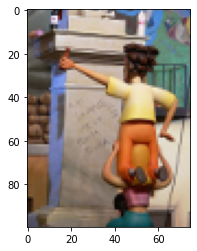

In [52]:
#example_image = plt.imread("../fruits-creatures.png")
#example_image = plt.imread("test-images/bangalore-dancers-s2.jpg")
example_image = plt.imread("test-images/las-fallas-s2.jpg")
#example_image = plt.imread("tu_an_vs_phun.jpg")
plt.imshow(example_image);

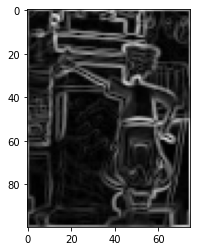

In [53]:
plt.imshow(energy(example_image), cmap="gray");

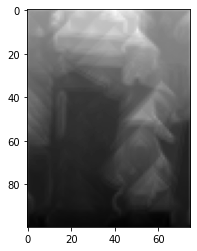

In [54]:
plt.imshow(minimal_energy_to_bottom(example_image), cmap="gray");

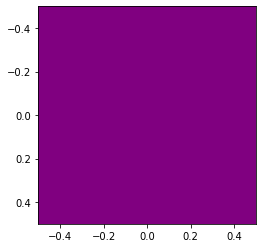

In [55]:
plt.imshow(np.array([128,0,128]).reshape(1,1,3));

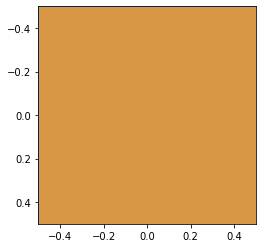

In [56]:
plt.imshow(example_image[65,50,:].reshape(1,1,3));  # the pixel on the orange pants

In [57]:
example_image[65,50,:]

array([215, 150,  68], dtype=uint8)

```python
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-97-6a7efbbd351a> in <module>
----> 1 example_image[50:65,50:55,:] = [0,0,0]
      2 plt.imshow(example_image_cp);

ValueError: assignment destination is read-only

```

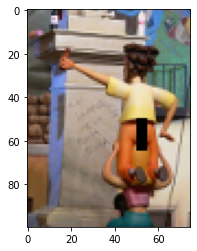

In [58]:
example_image_cp = example_image.copy()
example_image_cp[50:65,50:55,:] = [0,0,0]
plt.imshow(example_image_cp);

In [59]:
example_image.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : False
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [60]:
example_image_cp.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

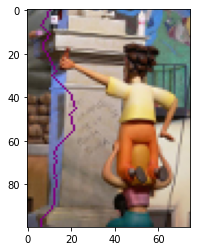

In [61]:
draw_seam(example_image)

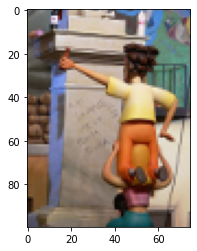

In [62]:
plt.imshow(example_image);

In [63]:
from utils import *

CPU times: user 8.49 s, sys: 9.07 ms, total: 8.5 s
Wall time: 9.18 s


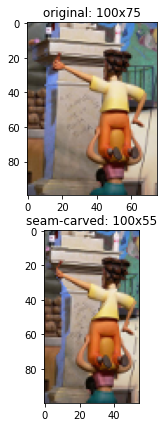

In [64]:
%time liquidify(example_image, 20)

### Like in Julia, I'd like to bind a variable to a slider

In [65]:
from ipywidgets import widgets, interact

In [66]:
n_seams = widgets.Text()

def f(x):
    n_seams.value = str(x)

interact(f, x=10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.f(x)>

In [67]:
n_seams

Text(value='10')

In [68]:
type(n_seams)

ipywidgets.widgets.widget_string.Text

In [69]:
n_seams.value

'10'